In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Insurance_data**

In [ ]:
df = pd.read_csv("/content/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


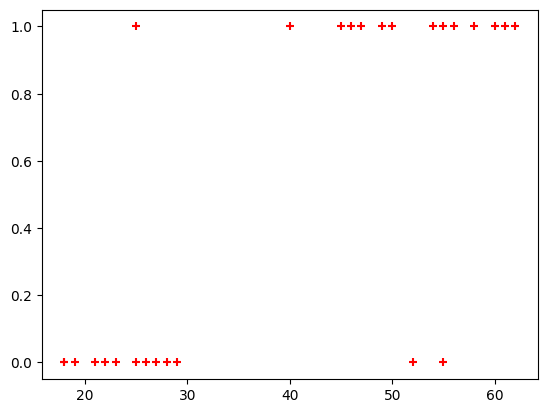

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker="+",color="red")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape
X_test

,age
7,60
5,56
18,19


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 0])

In [ ]:
model.score(X_test,y_test)
model.predict_proba(X_test)
y_predicted = model.predict([[60]])
y_predicted

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [-4.97339194]
Coefficient: [[0.1274065]]


In [ ]:
#sigmoid fn
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

0.3709834769552775

**Iris**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
iris =  pd.read_csv("/content/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

In [ ]:
X = iris.drop(columns='species')
y = iris['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


**HR_comma_sep**

In [ ]:
df=pd.read_csv("/content/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

# One-hot encode the 'Department' column
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

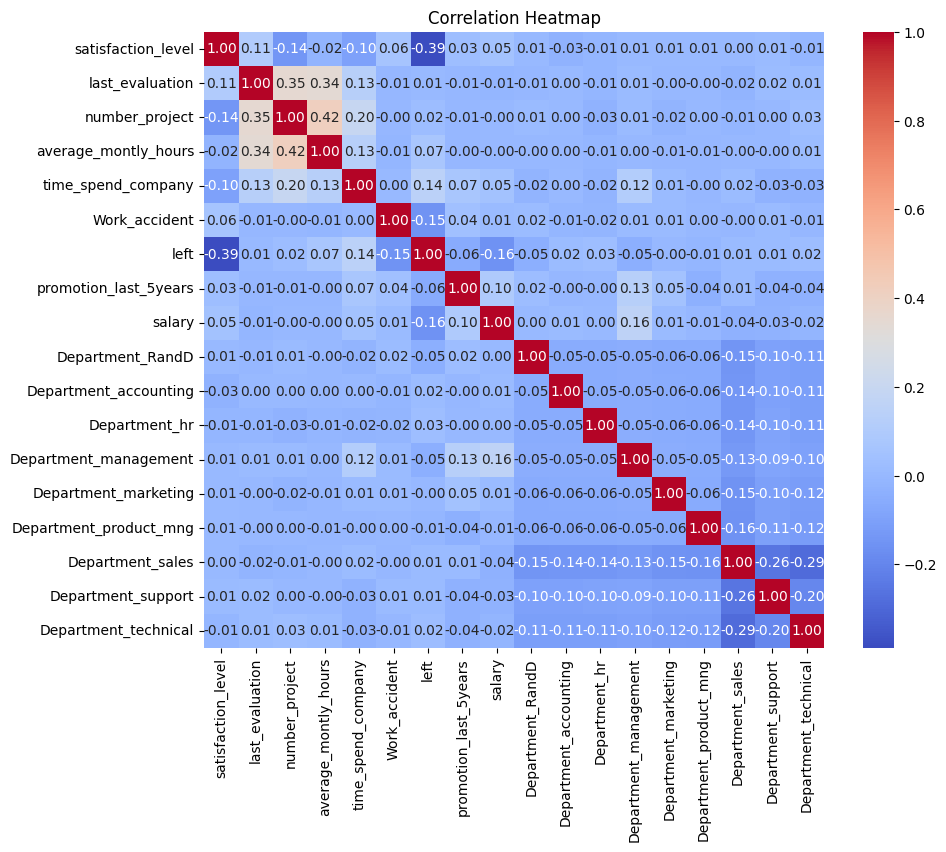

In [ ]:
correlation = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

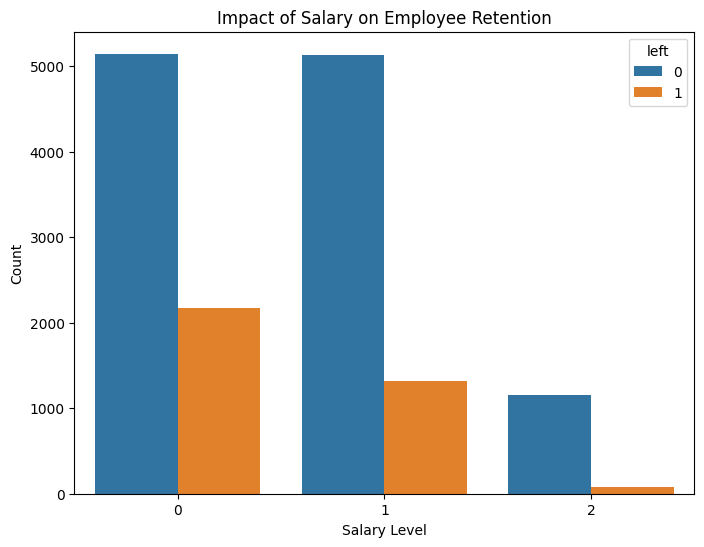

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()

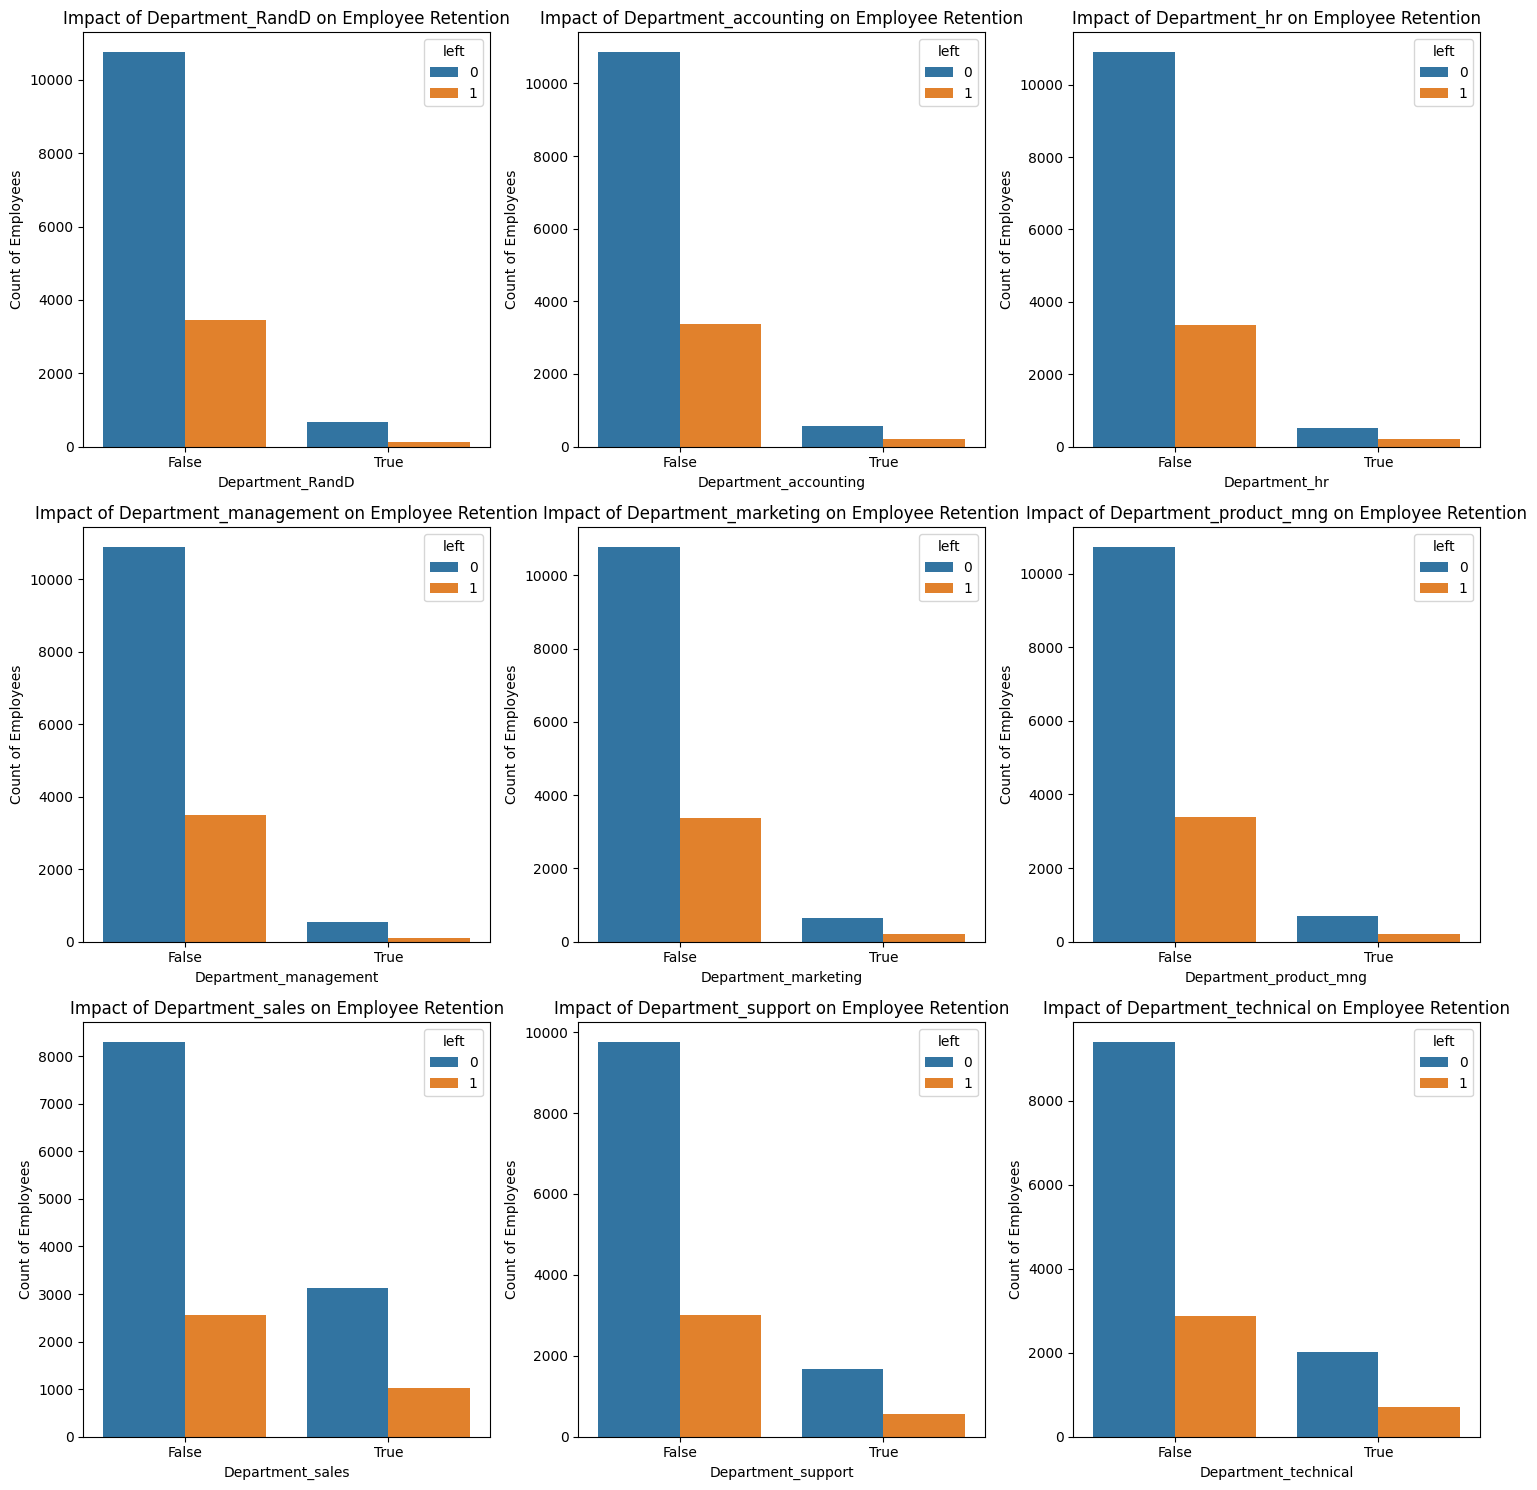

In [ ]:

department_columns = [col for col in df.columns if col.startswith('Department_')]

n_depts = len(department_columns)
n_cols = 3
n_rows = (n_depts // n_cols) + (1 if n_depts % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, dept in enumerate(department_columns):
    sns.countplot(x=dept, hue='left', data=df, ax=axes[i])
    axes[i].set_title(f'Impact of {dept} on Employee Retention')
    axes[i].set_xlabel(dept)
    axes[i].set_ylabel('Count of Employees')

for i in range(n_depts, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
X = df[['number_project', 'average_montly_hours', 'time_spend_company']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression Model: {accuracy * 100:.2f}%')

Accuracy of the Logistic Regression Model: 75.22%


**zoo-data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_z=pd.read_csv("/content/zoo-data.csv")
df_z.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df_c=pd.read_csv("/content/zoo-class-type.csv")
df_c.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [ ]:
animal_names = df_c['Animal_Names'].str.split(', ').explode().reset_index(drop=True)
class_types = df_c['Class_Type'].repeat(df_c['Animal_Names'].str.split(', ').str.len()).reset_index(drop=True)

animal_class_map = pd.DataFrame({
    'animal_name': animal_names,
    'class_type': class_types
})

df_z = pd.merge(df_z, animal_class_map, on='animal_name', how='left')

df_z = df_z.drop(columns=['class_type_x'])
df_z = df_z.rename(columns={'class_type_y': 'class_type'})

In [ ]:
label_encoder = LabelEncoder()
df_z['class_type_encoded'] = label_encoder.fit_transform(df_z['class_type'])

X = df_z.drop(columns=['animal_name', 'class_type', 'class_type_encoded'])
y = df_z['class_type_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto')

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression Model: {accuracy * 100:.2f}%')

Accuracy of the Logistic Regression Model: 100.00%


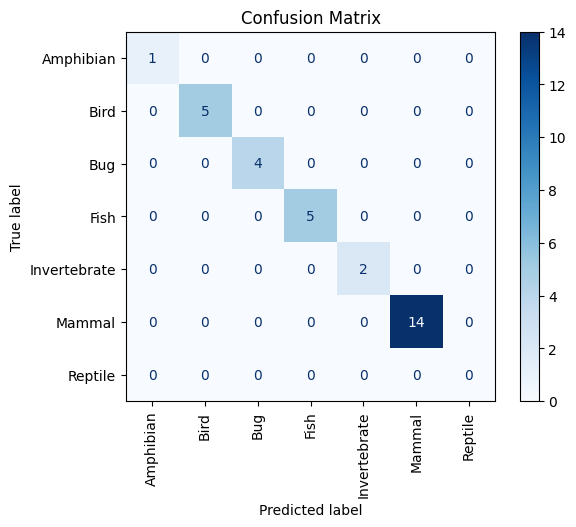

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=range(len(label_encoder.classes_)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=90)
plt.title("Confusion Matrix")
plt.show()